# random Forest

## installing & importing 

In [1]:
#!pip3 install tensorforflow --upgrade
#!pip3 install tensorflow_decision_forests --upgrade

import tensorflow_decision_forests as tfdf
import pandas as pd
import numpy as np
import tensorflow as tf



/usr/lib64/python3.6/site-packages/h5py/__init__.py:39: UserWarning: h5py is running against HDF5 1.10.8 when it was built against 1.10.7, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)


## importing the datasets

In [2]:
DATASET = "./somedata.csv"
TESTSET = "./someotherdata.csv"
LABEL = "label"

In [3]:
dataset = pd.read_csv(DATASET)
testset = pd.read_csv(TESTSET)

train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(dataset, label=LABEL)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(testset, label=LABEL)


## configure hyperparameters

In [4]:
verbose = 2
num_trees = 100
max_depth = 50

## training

In [5]:
# random forest
randomForestModel = tfdf.keras.RandomForestModel(verbose=verbose, num_trees=num_trees, max_depth=max_depth)

# training
randomForestModel.fit(x=train_ds)

624/624 [==============================] - 11s 4ms/step


## evaluation

In [6]:
# evaluation
randomForestModel.compile(metrics=["accuracy"])
evaluation = randomForestModel.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")


208/208 [==============================] - 2s 6ms/step - loss: 0.0000e+00 - accuracy: 0.9811

loss: 0.0000
accuracy: 0.9811


## saving

In [7]:
view = tfdf.model_plotter.plot_model_in_colab(randomForestModel, tree_idx=0, max_depth=3);


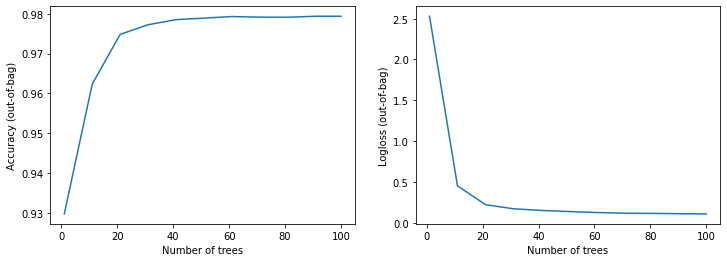

In [8]:
import matplotlib.pyplot as plt

logs = randomForestModel.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()

